## Import Libraries and Database

In [3]:
# Call the libraries
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as ptl

# Load the database
data = pd.read_csv("CTG.csv")

# Delete the first column
data = data.drop(data.columns[0], axis=1)

data.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,0,0,0,73,0.5,43,2.4,0,0,...,62,126,2,0,120,137,121,73,1,2
1,132,4,0,4,17,2.1,0,10.4,2,0,...,68,198,6,1,141,136,140,12,0,1
2,133,2,0,5,16,2.1,0,13.4,2,0,...,68,198,5,1,141,135,138,13,0,1
3,134,2,0,6,16,2.4,0,23.0,2,0,...,53,170,11,0,137,134,137,13,1,1
4,132,4,0,5,16,2.4,0,19.9,0,0,...,53,170,9,0,137,136,138,11,1,1


## Create the Dataframe

In [4]:
df_data = pd.DataFrame(data)
df_data = df_data.drop(columns=["NSP"])
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   int64  
 1   AC        2126 non-null   int64  
 2   FM        2126 non-null   int64  
 3   UC        2126 non-null   int64  
 4   ASTV      2126 non-null   int64  
 5   MSTV      2126 non-null   float64
 6   ALTV      2126 non-null   int64  
 7   MLTV      2126 non-null   float64
 8   DL        2126 non-null   int64  
 9   DS        2126 non-null   int64  
 10  DP        2126 non-null   int64  
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 13  Max       2126 non-null   int64  
 14  Nmax      2126 non-null   int64  
 15  Nzeros    2126 non-null   int64  
 16  Mode      2126 non-null   int64  
 17  Mean      2126 non-null   int64  
 18  Median    2126 non-null   int64  
 19  Variance  2126 non-null   int64  
 20  Tendency  2126 non-null   int6

## Separate the Dataframe for Training, Testing and Validation

In [5]:
from sklearn.model_selection import train_test_split

# Separate 50% of the data for training
x_train, x_temp, y_train, y_temp = train_test_split(df_data, data["NSP"], test_size=0.5, random_state=42)

# Separate 25% of the data for validation and 25% for testing
x_validation, x_test, y_validation, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

## Find the Best Model

In [6]:
from sklearn.svm import SVC

models_score = []
highest = -1

# Test the different models
for i in('linear', 'poly', 'rbf', 'sigmoid'):
    for j in (0.1, 1, 10):
        SVM = SVC(kernel=i, C=j)
        SVM.fit(x_train, y_train)
        pred = SVM.predict(x_validation)
        acc = sk.metrics.accuracy_score(y_validation, pred)
        
        # Save the best model
        if acc > highest:
            best_model = SVM
            best_kernel = i
            best_c = j
            highest = acc
    
        # Save the score and the name of the model
        models_score.append(acc)
        


## Plot the Accuracy of Each Model

Kernel: linear  C: 10  Score: 0.8888888888888888


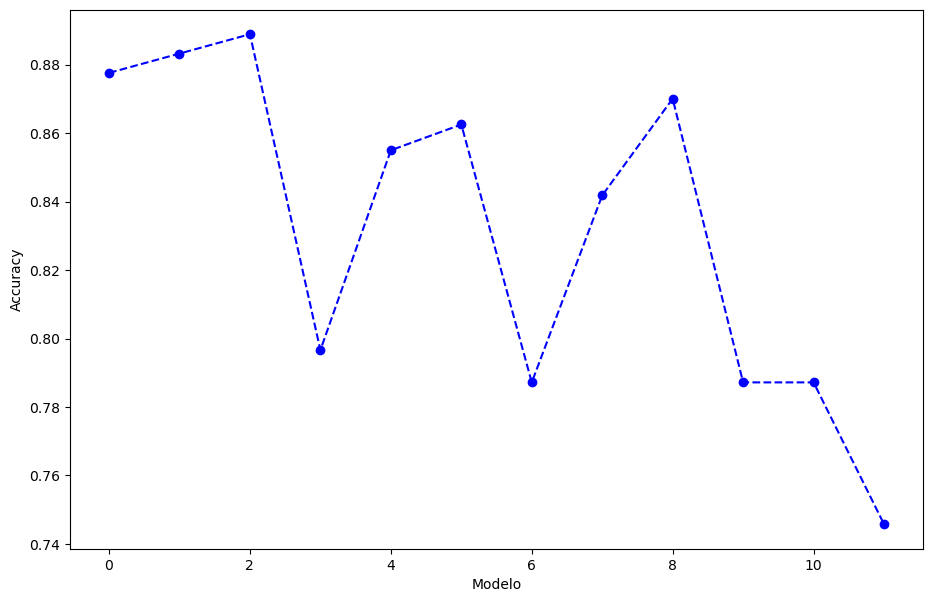

In [7]:
# Graph the results
ptl.figure(figsize=(11,7))
ptl.plot(range(len(models_score)), models_score, color='blue', linestyle='dashed', marker='o')
ptl.xlabel('Modelo')
ptl.ylabel('Accuracy')

# Show the best configuration
print("Kernel:", best_kernel, " C:", best_c, " Score:", highest)

# Runs the best model

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix

pred = best_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print("Acuracy:", acc)
confusion_matrix(y_test, pred)

Acuracy: 0.900375939849624


array([[390,  18,   3],
       [ 15,  58,   8],
       [  2,   7,  31]])